In [11]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import seaborn as sns
file = pd.read_csv("Wholesale customers data.csv")

file.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
file.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


C:\Users\vijaykumarj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vijaykumarj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vijaykumarj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vijaykumarj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto

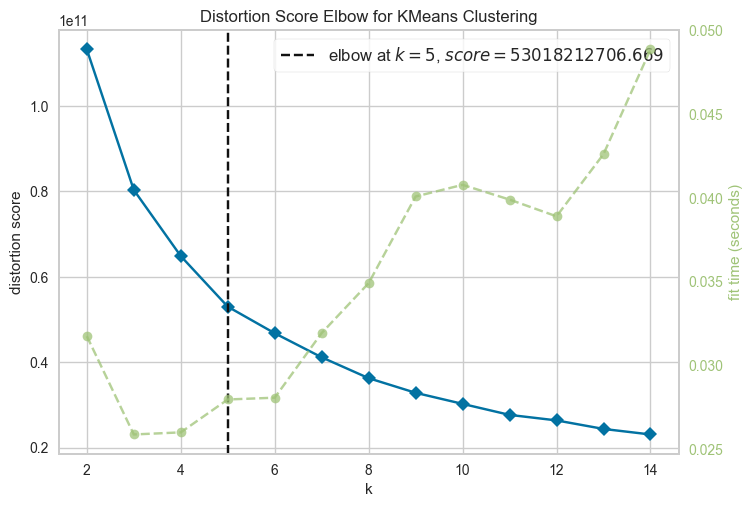

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,15))

 
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [49]:
x = file.iloc[:,:].values
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_means = kmeans.fit_predict(x)

C:\Users\vijaykumarj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
y_means

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 4, 4, 1, 0, 0, 0, 1, 4, 1, 0, 1, 0, 1,
       0, 4, 0, 0, 1, 0, 4, 3, 0, 1, 0, 0, 1, 1, 0, 4, 4, 3, 0, 0, 4, 4,
       1, 4, 4, 2, 1, 4, 1, 1, 3, 4, 0, 1, 4, 4, 1, 1, 1, 2, 1, 4, 1, 2,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 4, 1, 1, 1, 4, 1, 0, 1, 2, 2, 3,
       1, 0, 1, 1, 4, 0, 4, 1, 1, 1, 1, 1, 4, 4, 1, 3, 0, 0, 4, 4, 1, 4,
       1, 4, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 3, 3, 0, 0, 1, 3, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 3, 1, 0, 4, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 4, 4, 0, 1, 4, 1, 1, 0, 4, 1, 4, 1, 1, 1, 1, 4, 4, 1, 4, 1, 4,
       3, 1, 1, 1, 1, 3, 4, 3, 1, 1, 1, 1, 4, 4, 0, 1, 1, 4, 1, 0, 0, 1,
       1, 1, 4, 4, 0, 1, 1, 4, 1, 1, 1, 4, 0, 2, 1, 1, 4, 4, 4, 0, 4, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 3, 0, 0,
       0, 1, 1, 4, 1, 1, 0, 1, 1, 4, 1, 0, 1, 0, 1, 1, 3, 3, 1, 1, 0, 1,
       4, 4, 4, 0, 4, 0, 1, 1, 1, 3, 1, 1, 0, 1, 1, 0, 1, 1, 3, 0, 3, 3,
       1, 0, 0, 3, 1, 1, 1, 4, 0, 1, 0, 1, 1, 1, 0,

In [51]:
x[y_means == 3,0]

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1], dtype=int64)

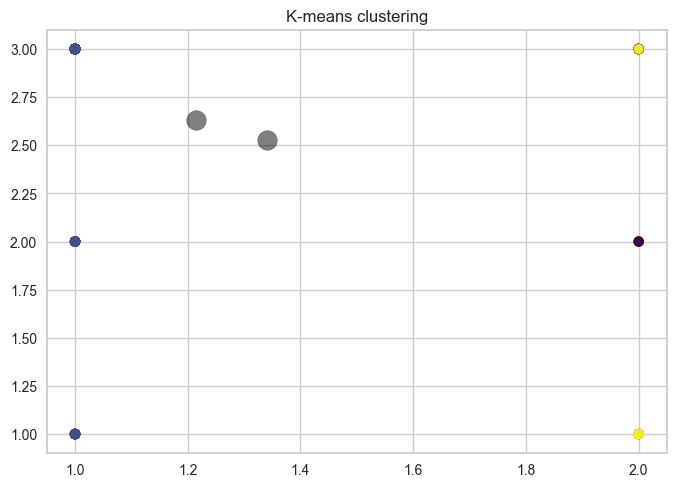

In [56]:
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('K-means clustering')
plt.show()

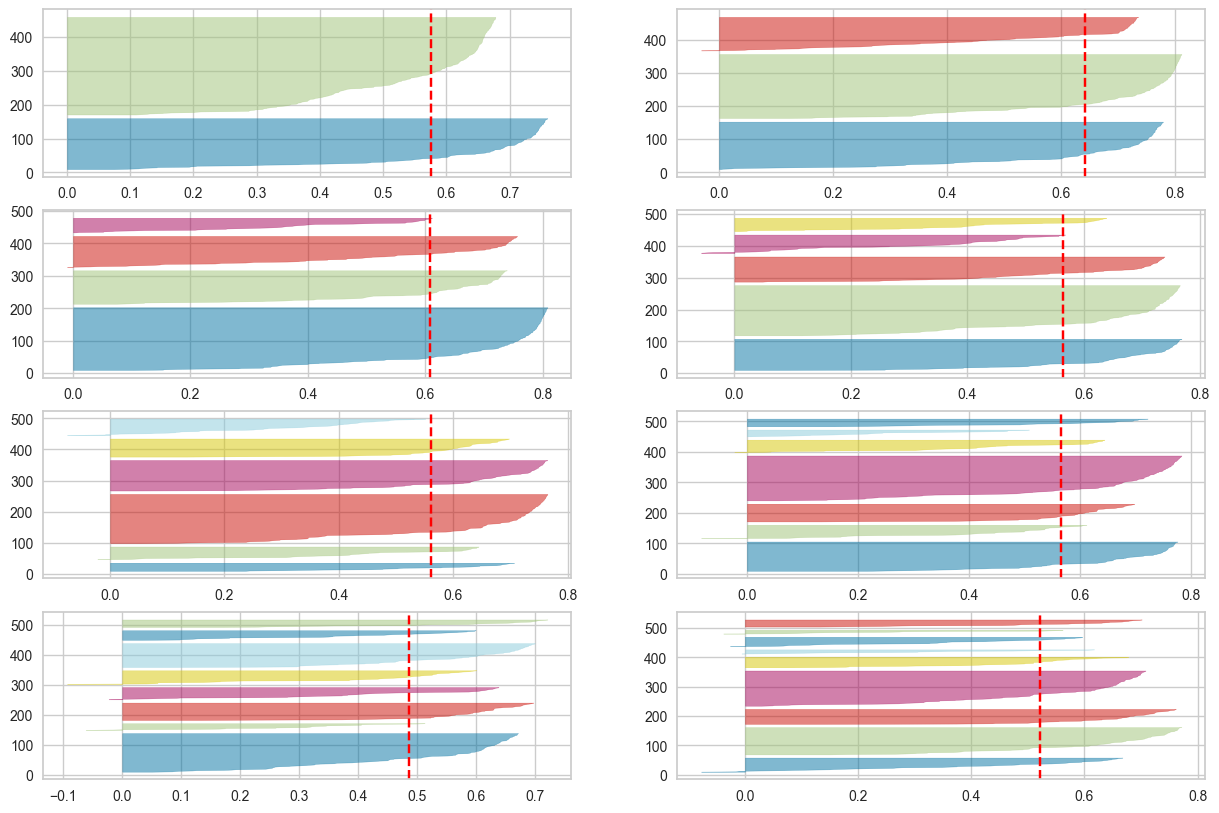

In [20]:
fig, ax = plt.subplots(4, 2, figsize=(15,10))
for i in [2,3, 4, 5, 6,7,8,9]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(cus) 

In [66]:
score = silhouette_score(x, kmeans.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.002


In [67]:
sc = StandardScaler()

xsc = sc.fit_transform(file)
xnor = normalize(xsc)

cus = pd.DataFrame(xnor)

In [60]:
pca = PCA(n_components = 2)
Xpr = pca.fit_transform(cus)
cus = pd.DataFrame(Xpr)
cus.columns = ['X1','X2']
cus.head()

,X1,X2
0,0.808828,-0.381932
1,0.914432,-0.401807
2,0.659273,-0.173878
3,-0.648142,-0.155067
4,0.562708,-0.107969


In [61]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_means = kmeans.fit_predict(cus)

C:\Users\vijaykumarj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [62]:
y_means

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       3, 4, 0, 0, 1, 1, 0, 3, 3, 1, 1, 3, 1, 0, 3, 0, 0, 3, 3, 1, 0, 0,
       0, 0, 0, 4, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 4, 0, 0, 1, 0,
       1, 0, 1, 1, 3, 3, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 4, 4, 3,
       1, 3, 1, 1, 0, 3, 0, 1, 0, 1, 1, 1, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0,
       1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 1, 0, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 0, 0, 1, 1, 1, 0, 1, 1, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2, 2, 3, 1, 1, 3, 3, 1, 0, 1, 0, 3, 3, 3, 3,
       1, 1, 1, 3, 1, 1, 1, 4, 2, 4, 2, 4, 4, 3, 4,

In [70]:
x[y_means == 3,0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

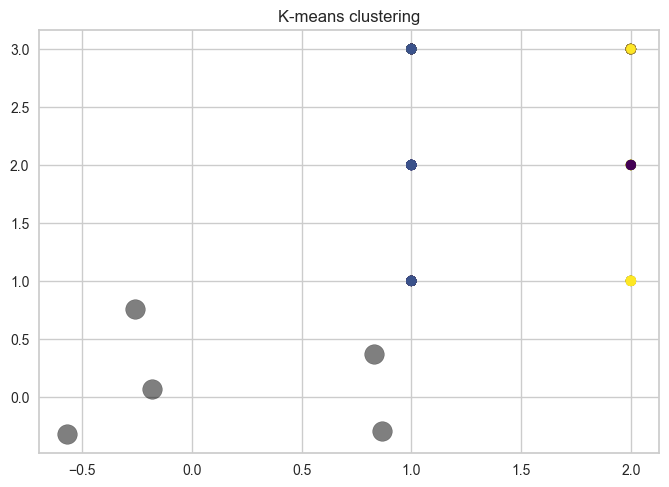

In [64]:
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('K-means clustering')
plt.show()

In [68]:
score = silhouette_score(cus, kmeans.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.322
